## Importing necessary libraries and algorithms

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Data Preprocessing and EDA

#### Reading csv file into a Dataframe

In [40]:
stock_data = pd.read_csv('Stock_price.csv')

#### Making a copy of original df for EDA

In [41]:
viz_data = stock_data.copy()

#### Exploring various columns and number of null values in each column

In [42]:
stock_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [43]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [44]:
stock_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#### Checking similarity b/w values of "Adj Close" and "Close" columns

In [45]:
stock_data.loc[stock_data['Close']==stock_data['Adj Close']].shape

(1009, 7)

In [46]:
stock_data.shape

(1009, 7)

In [47]:
stock_data['Close'].corr(stock_data['Adj Close'])

0.9999999999999999

#### Dropping "Adj Close" column (since its identical) and "Date" column

In [48]:
stock_data.drop(columns=['Adj Close', 'Date'], axis=1, inplace=True)

#### Observing numeric data. Since all columns except volume have same units, no need for standardization

In [49]:
stock_data.describe()

,Open,High,Low,Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,5.890430e+07


#### Spotting "Close" price trends with increase in time

In [50]:
viz_data = viz_data.sort_values(by='Date')

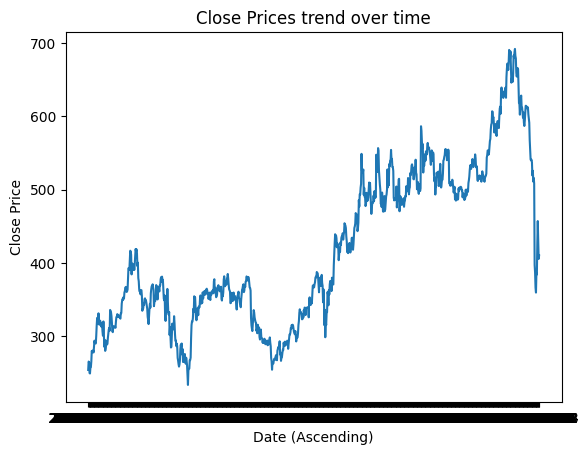

In [73]:
date = viz_data['Date']
close = viz_data['Close']

plt.plot(date, close)
plt.xlabel("Date (Ascending)")
plt.ylabel("Close Price")
plt.title("Close Prices trend over time")
plt.savefig('EDA_1.png')
plt.show()

#### Plotting Kernel Density Plots for each column

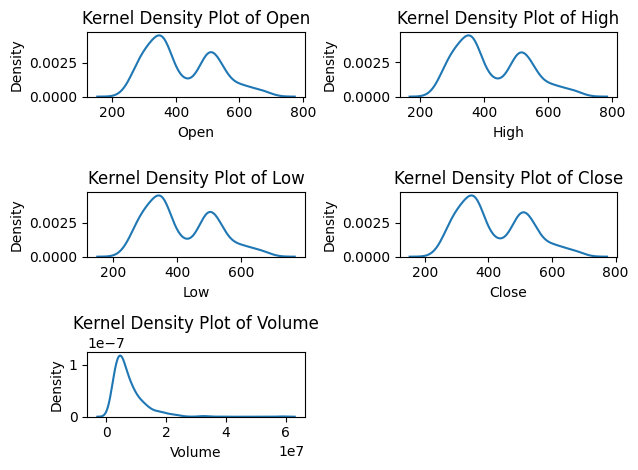

In [74]:
for i, column in enumerate(stock_data.columns, 1):
    plt.subplot(3, 2, i)
    sns.kdeplot(viz_data[column])

    plt.xlabel(column)
    plt.title(f'Kernel Density Plot of {column}')

plt.tight_layout()
plt.savefig('EDA_2.png')
plt.show()

#### Plotting Box plots for outlier detection

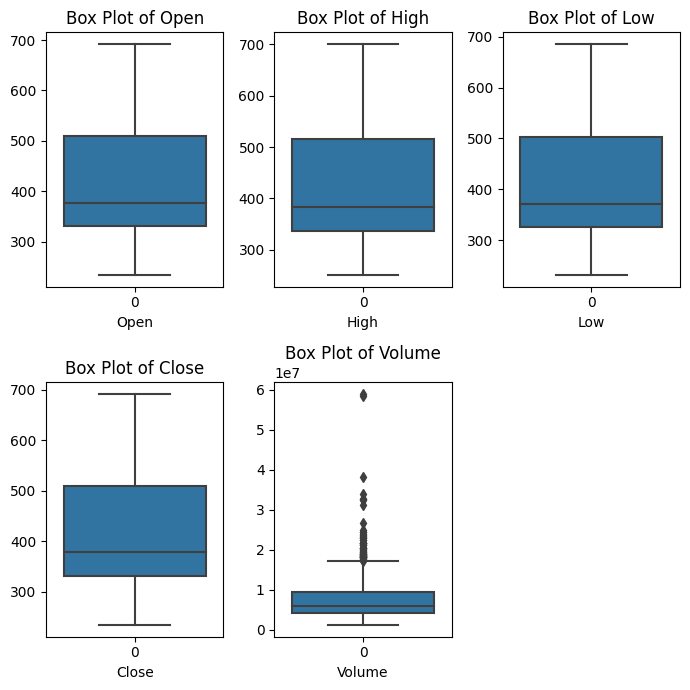

In [75]:
plt.figure(figsize=(7, 7))
for i, column in enumerate(stock_data.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(viz_data[column])

    plt.xlabel(column)
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.savefig('EDA_3.png')
plt.show()

#### Plotting heatmap for visualizing correlations

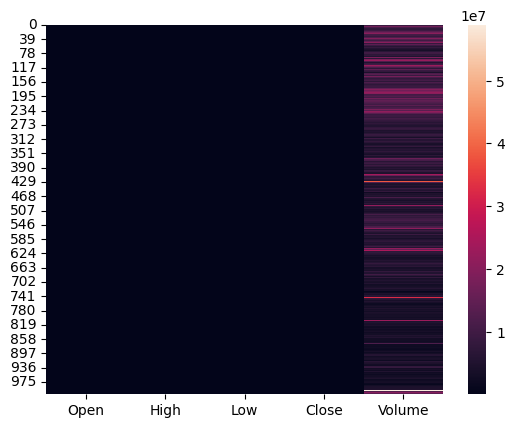

In [76]:
sns.heatmap(stock_data)
plt.savefig('EDA_4.png')
plt.show()

## Machine Learning steps

#### Splitting Data-Target values into training and testing sets

In [55]:
X = stock_data.drop(columns='Close').values
y = stock_data['Close'].values

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Linear Regression Model training and evaluation

In [57]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [58]:
y_pred_lr = lr_model.predict(X_test)

In [59]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'MSE for Linear Regression: {mse_lr}')

MSE for Linear Regression: 14.042264565842073


In [60]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f'MAE for Linear Regression: {mae_lr}')

MAE for Linear Regression: 2.7401185160033372


#### Random Forest Regression Model training and evaluation

In [61]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [62]:
y_pred_rf = rf_model.predict(X_test)

In [63]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'MSE for Random Forest: {mse_rf}')

MSE for Random Forest: 25.625854534930138


In [64]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f'MAE for Random Forest: {mae_rf}')

MAE for Random Forest: 3.618418071947204


#### K-Nearest Neighbours Regression Model training and evaluation

In [65]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [66]:
y_pred_knn = knn_model.predict(X_test)

In [67]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f'MSE for KNN: {mse_knn}')

MSE for KNN: 8477.816442584646


In [68]:
mae_knn = mean_absolute_error(y_test, y_pred_knn)
print(f'MAE for KNN: {mae_knn}')

MAE for KNN: 73.38085805676569


## Model Results Visualization

#### Plotting scatter and density plots

In [77]:
def visualize_model(model_name, test_data, predictions):
    plt.figure(figsize=(10, 5))
    plt.suptitle(f"{model_name} Visualization", fontsize=16)
    
    plt.subplot(1, 2, 1)
    plt.scatter(test_data, predictions, color='red', alpha=0.5)
    plt.plot(test_data, test_data, color="black")
    plt.title("Scatter Plot")
    plt.xlabel("Test Data")
    plt.ylabel(f"Predictions by {model_name} model")

    plt.subplot(1, 2, 2)
    sns.kdeplot(test_data, label='True Values', alpha=0.5)
    sns.kdeplot(predictions, label='Predicted Values', alpha=0.5)
    plt.title("Density Plot")
    plt.legend()
    
    plt.tight_layout()
    plt.savefig(f'{model_name}_results.png')
    plt.show()

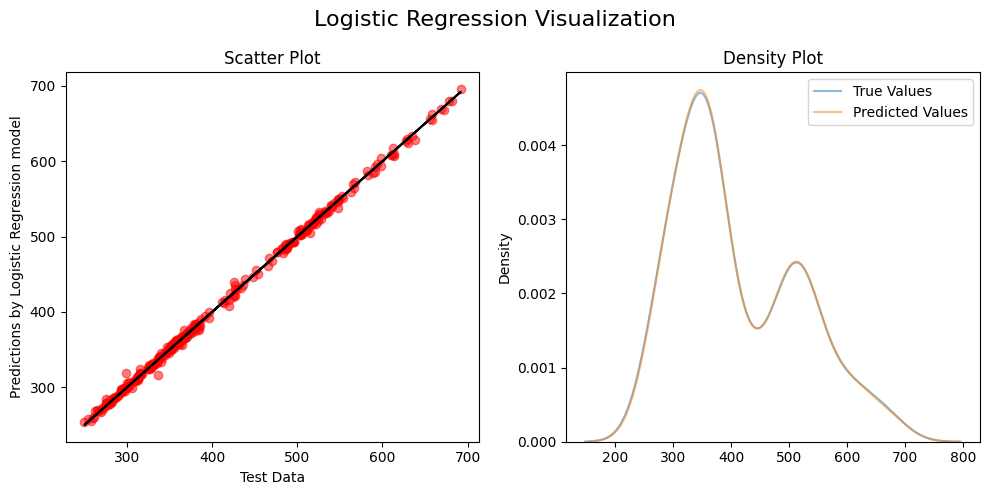

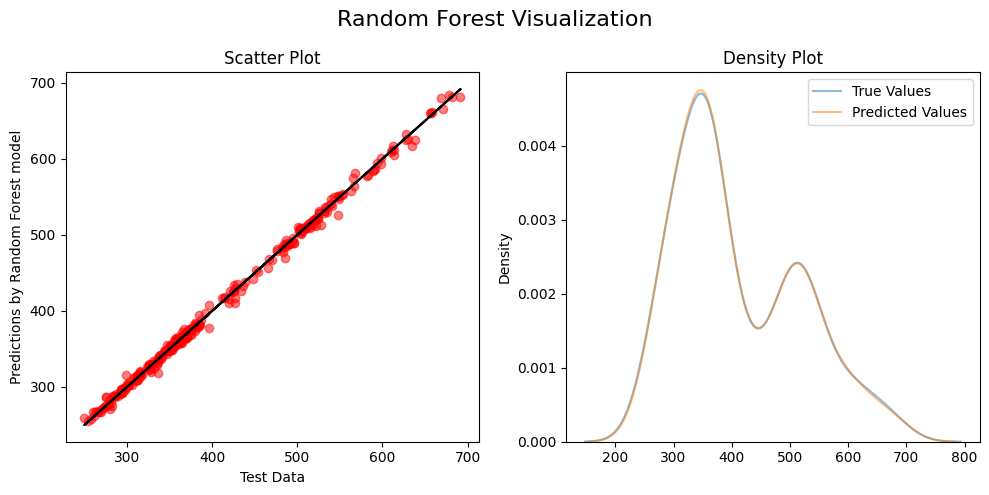

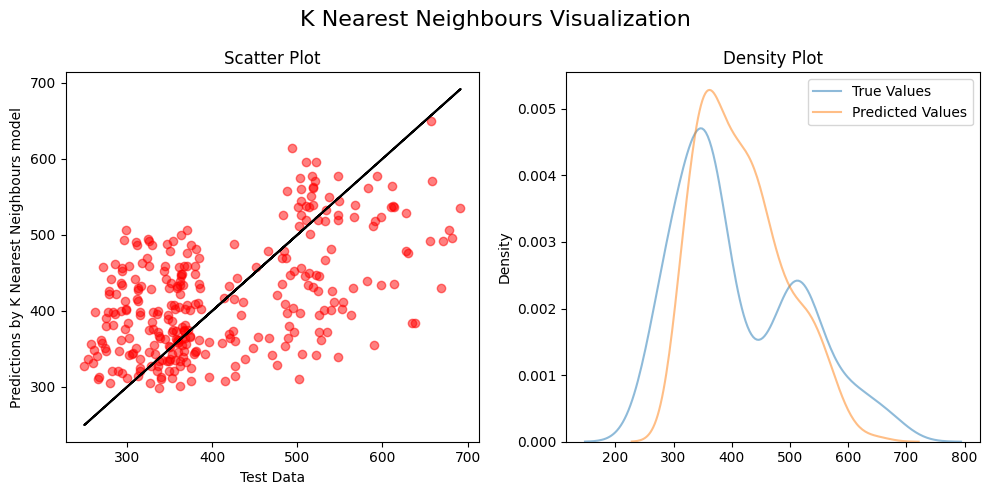

In [78]:
visualize_model("Logistic Regression", y_test, y_pred_lr)
visualize_model("Random Forest", y_test, y_pred_rf)
visualize_model("K Nearest Neighbours", y_test, y_pred_knn)

## Storing all models' results into a .csv file

In [71]:
results_dict = {'Logistic Regression' : [mse_lr, mae_lr], 'Random Forest' : [mse_rf, mae_rf], 
                'KNN' : [mse_knn, mae_knn]}
results_df = pd.DataFrame(results_dict, index=['MSE', 'MAE'])

In [72]:
results_df.to_csv('results.csv')